# **Tugas Besar IF5100 Pemrograman untuk Data Analitik**
# **Kelompok 6**

##**Tamara Mayranda Lubis (18222026)**

##**Tantan Nugraha (23525015)**

##**Era Desti Ramayani (23525020)**

## **Data Preparation**

### **Import Library**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.animation as animation
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### **Load Dataset**

In [3]:
# Memuat dataset
telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_telco = pd.DataFrame(telco)

# Menampilkan 5 baris dari dataset
df_telco.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

Kode ini memuat dataset dari file CSV `WA_Fn-UseC_-Telco-Customer-Churn.csv` ke dalam DataFrame `df_telco` dan menampilkan 5 baris pertama dari data tersebut.

### **Exploration**

#### Mengecek Dataset

In [4]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Kode di atas digunakan untuk melihat metadata dari sebuah dataframe meliputi jumlah baris dan kolom, nama setiap kolom, jumlah nilai non-null, tipe data tiap kolom dan memori usage.

#### Mengecek Dimensi

In [5]:
df_telco.shape

(7043, 21)

Kode di atas digunakan untuk mengembalikan tuple yang berisi jumlah baris (7043 baris) dan jumlah kolom (21 kolom)

#### Mengecek Tipe Data

In [6]:
df_telco.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Berdasarkan hasil pengecekan tipe data hampir seluruh kolom sudah sesuai tipe datanya. Terdapat 1 kolom yang tidak sesuai tipe datanya yaitu kolom TotalCharges. Kolom ini bertipe data object padahal seharusnya bertipe data float karena TotalCharges akumulasi dari MonthlyCharges

#### Mengecek Deskriptif Statistik

In [7]:
df_telco.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

Kode di atas digunakan untuk menampilkan ringkasan statistik deskriptif dari dataframe



#### Mengecek Nilai yang Kosong

In [8]:
df_telco.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Berdasarkan hasil pengecekkan nilai kosong menggunakan isnull().sum() tidak terdapat nilai kosong yang ditemukan

#### Mengecek Kolom yang hanya berisi Whitespaces

In [9]:
# Mengecek apakah ada kolom yang hanya berisi whitespaces
result = df_telco.apply(lambda col: col.str.contains(r"^\s+|\s+$") if col.dtype == 'object' else False).any()

# Menampilkan hasil pengecekan
print("\nResult blank whitespaces per column:")
print(result)


Result blank whitespaces per column:
customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool


Berdasarkan hasil pengecekkan, kolom TotalCharges memiliki kolom yang berisi whitespaces karena bernilai True

#### Mengecek kolom duplikat

In [10]:
df_telco[df_telco.duplicated()]

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]



```
# Ini diformat sebagai kode
```

Berdasarkan hasil pengecekkan tidak terdapat kolom yang duplikat

#### Mengecek Nilai Distribusi Target

In [11]:
print(df_telco['Churn'].value_counts(normalize=True))

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


**Berdasarkan** hasil pengecekkan distribusi target terdapat nilai proporsi Churn  No sebanyak 73% (tidak lanjut berlangganan) dan Churn Yes sebanyak 26% (lanjut berlangganan)

#### Mengecek Kategori Unik

In [12]:
print("\nHasil Pengecekkan Kategori yang Unik:")
for col in df_telco.select_dtypes(include='object').columns:
    print(col, df_telco[col].unique())


Hasil Pengecekkan Kategori yang Unik:
customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


Kode ini menunjukkan kategori unik untuk masing-masing kolom bertipe string dalam dataset, seperti `gender` yang memiliki nilai 'Female' dan 'Male', atau `Partner` yang memiliki nilai 'Yes' dan 'No'. Kolom seperti `TotalCharges` dan `customerID` berisi nilai yang lebih spesifik atau numerik.


#### Mengecek Outliers

Kolom 'SeniorCitizen' berhasil dihapus dari analisis outlier.


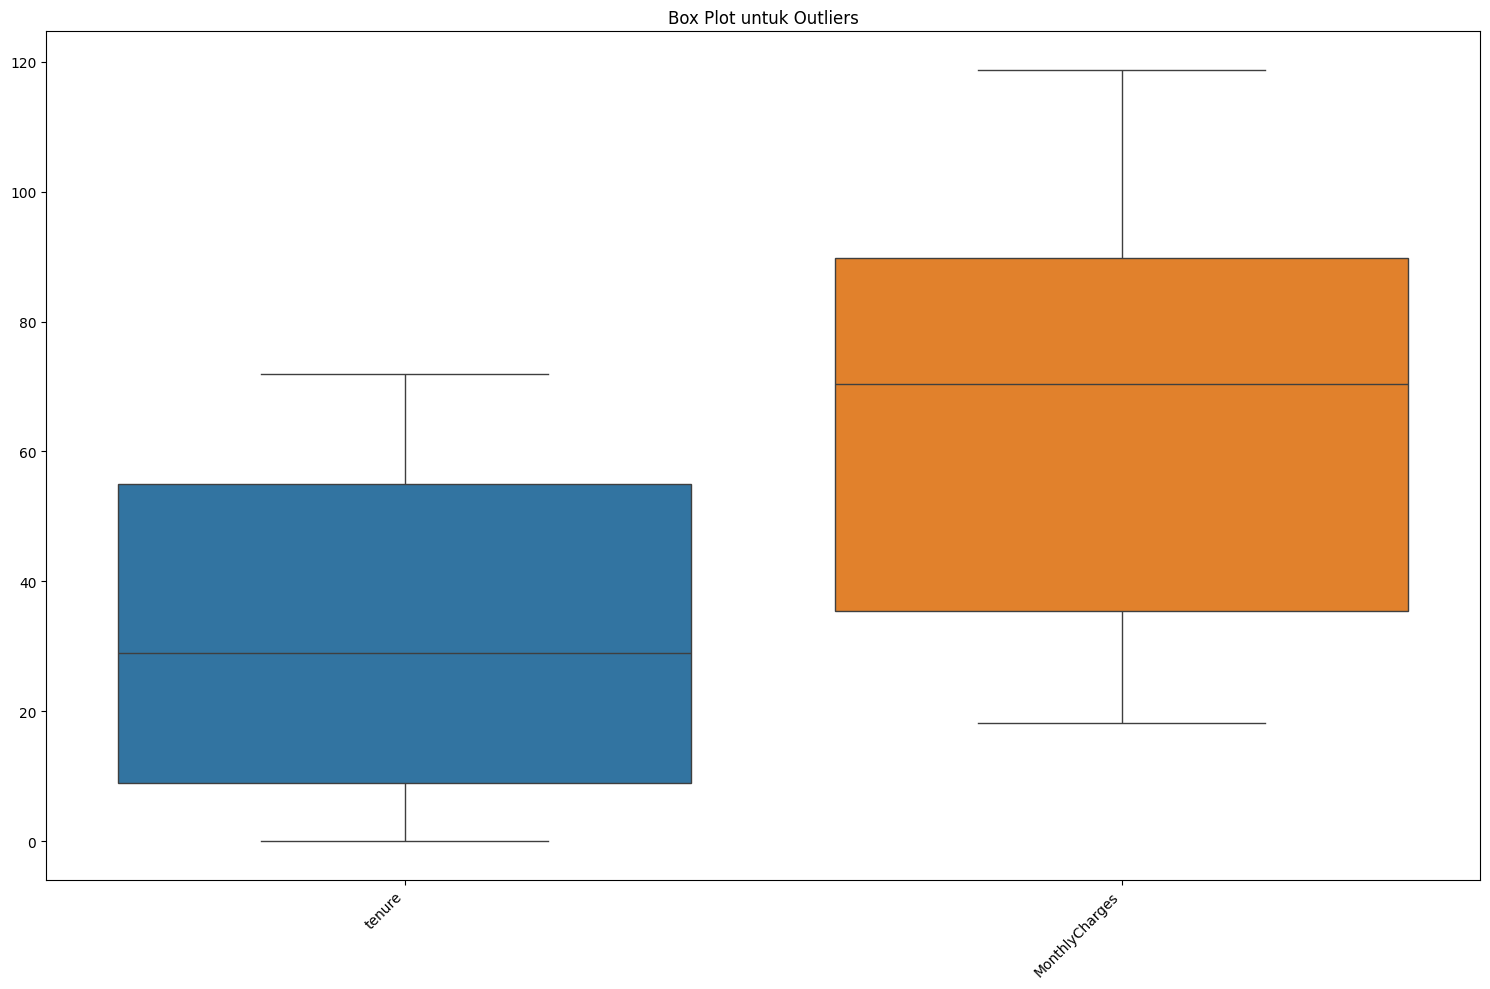


Batas bawah untuk Outliers:
tenure           -60.000
MonthlyCharges   -46.025
dtype: float64

Batas atas untuk Outliers:
tenure            124.000
MonthlyCharges    171.375
dtype: float64


In [13]:
# Memilih hanya kolom yang bertipe numerik float dan integer dari df_telco
numeric_df_telco = df_telco.select_dtypes(include=['float64', 'int64'])

# Drop kolom 'SeniorCitizen'
if 'SeniorCitizen' in numeric_df_telco.columns:
    numeric_df_telco = numeric_df_telco.drop(columns=['SeniorCitizen'])
    print("Kolom 'SeniorCitizen' berhasil dihapus dari analisis outlier.")
else:
    print("Kolom 'SeniorCitizen' tidak ditemukan dalam data numerik.")

# Menghitung kuartil pertama (Q1) atau nilai 25% untuk setiap kolom numerik
Q1 = numeric_df_telco.quantile(0.25)

# Menghitung kuartil ketiga (Q3) atau nilai 75% untuk setiap kolom numerik
Q3 = numeric_df_telco.quantile(0.75)

# Menghitung IQR (Interquartile Range)
IQR = Q3 - Q1

# Menghitung batas bawah data normal
lower_bound = Q1 - 1.5 * IQR

# Menghitung batas atas data normal
upper_bound = Q3 + 1.5 * IQR

# Membuat plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_telco[numeric_df_telco.columns])
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot untuk Outliers')
plt.tight_layout()
plt.show()

# Menampilkan ulang batas outlier yang sudah dihitung
print("\nBatas bawah untuk Outliers:")
print(lower_bound)

print("\nBatas atas untuk Outliers:")
print(upper_bound)

Berdasarkan perhitungan Batas Outlier (IQR) pada data Telco, fitur **`tenure`** (lama berlangganan) dan **`MonthlyCharges`** (biaya bulanan) **tidak memiliki *outlier* yang signifikan**, rentang nilai data berada sepenuhnya di dalam batas normal (antara *Lower Bound* dan *Upper Bound* IQR), menunjukkan bahwa data pada aspek waktu dan biaya bulanan relatif bersih dari nilai ekstrem atau anomali yang dapat mengganggu pelatihan model.

### **Cleaning**

#### Menangani nilai yang hilang

In [14]:
# Hapus spasi awal/akhir pada kolom 'TotalCharges'
df_telco['TotalCharges'] = df_telco['TotalCharges'].str.strip()

Kode ini menghapus spasi yang ada di awal dan akhir nilai pada kolom 'TotalCharges' dalam DataFrame `df_telco` menggunakan fungsi `str.strip()`.

### **Validation**

#### Mengubah tipe data TotalCharges ke Numeric

In [15]:
df_telco['TotalCharges'] = pd.to_numeric(df_telco['TotalCharges'], errors='coerce')

Kode ini mengonversi kolom `'TotalCharges'` dalam DataFrame `df_telco` menjadi tipe data numerik menggunakan `pd.to_numeric()`. Jika ada nilai yang tidak bisa dikonversi (misalnya teks atau format yang salah), maka nilai tersebut akan diubah menjadi `NaN` karena parameter `errors='coerce'`.

### **Integration**

Pada proyek ini kami tidak melakukan integrasi dataset karena hanya menggunakan 1 sumber dataset saja

### **Encoding**

#### Melakukan Encoding Binary Untuk  Categorical Columns

In [16]:
binary_columns = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']
for col in binary_columns:
  df_telco[col] = df_telco[col].map({'Yes':1, 'No':0})

binary1_columns = ['gender']
for col in binary1_columns:
  df_telco[col] = df_telco[col].map({'Female':1, 'Male':0})

Berdasarkan proses encoding binary di atas terdapat beberapa kolom yang dipilih yaitu kolom Partner, Dependents, PhoneService, PaperlessBilling dan Churn untuk dilakukan encoding ke Nilai 1 dan 0 dengan kategori Yes dan No. Sementara untuk kolom gender dilakukan encoding ke nilai 1 dan 0 untuk kategori Female dan Male.

#### Melakukan One Hot Encoding untuk Multiclass Categorical Columns

In [17]:
multiclass_columns = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
]

# One-Hot Encoding dan drop kolom aslinya
df_telco = pd.get_dummies(df_telco, columns=multiclass_columns, drop_first=True)

print("One-Hot Encoding untuk fitur multiclass selesai.")

print("\nDataFrame setelah semua proses (df_telco.head()):")
df_telco[:10]

One-Hot Encoding untuk fitur multiclass selesai.

DataFrame setelah semua proses (df_telco.head()):


customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       1              0        1           0       1   
1  5575-GNVDE       0              0        0           0      34   
2  3668-QPYBK       0              0        0           0       2   
3  7795-CFOCW       0              0        0           0      45   
4  9237-HQITU       1              0        0           0       2   
5  9305-CDSKC       1              0        0           0       8   
6  1452-KIOVK       0              0        0           1      22   
7  6713-OKOMC       1              0        0           0      10   
8  7892-POOKP       1              0        1           0      28   
9  6388-TABGU       0              0        0           1      62   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   
5             1                 1           99.65        820.50  ...   
6             1                 1           89.10       1949.40  ...   
7             0                 0           29.75        301.90  ...   
8             1                 1          104.80       3046.05  ...   
9             1                 0           56.15       3487.95  ...   

   TechSupport_Yes  StreamingTV_No internet service  StreamingTV_Yes  \
0            False                            False            False   
1            False                            False            False   
2            False                            False            False   
3             True                            False            False   
4            False                            False            False   
5            False                            False             True   
6            False                            False             True   
7            False                            False            False   
8             True                            False             True   
9            False                            False            False   

   StreamingMovies_No internet service  StreamingMovies_Yes  \
0                                False                False   
1                                False                False   
2                                False                False   
3                                False                False   
4                                False                False   
5                                False                 True   
6                                False                False   
7                                False                False   
8                                False                 True   
9                                False                False   

   Contract_One year  Contract_Two year  \
0              False              False   
1               True              False   
2              False              False   
3               True              False   
4              False              False   
5              False              False   
6              False              False   
7              False              False   
8              False              False   
9               True              False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   
5                                

Untuk kolom yang memiliki multiple class maka teknik encoding yang dilakukan yaitu One-Hot Encoding sehingga nilai yang dihasilkan adalah True atau False

### **Feature Engineering**

#### Perbedaan Signifikan Pembayaran Pelanggan tiap Bulan

In [18]:
df_telco['AvgMonthlyCharges'] = np.where(df_telco['tenure'] > 0,
                                   df_telco['TotalCharges'] / df_telco['tenure'],
                                   0)

df_telco['ChargeDelta'] = df_telco['MonthlyCharges'] - df_telco['AvgMonthlyCharges']

Fitur **`AvgMonthlyCharges`** dihitung dari $\text{TotalCharges} / \text{tenure}$ untuk mendapatkan biaya bulanan rata-rata historis yang telah dibayar pelanggan, yang berguna sebagai dasar perhitungan Customer Lifetime Value (CLV) dan segmentasi. Fitur ini kemudian digunakan untuk menciptakan **`ChargeDelta`**, yaitu selisih antara biaya bulanan saat ini (**`MonthlyCharges`**) dengan `AvgMonthlyCharges` historis tersebut. `ChargeDelta` sangat penting sebagai prediktor karena mendeteksi potensi **'Bill Shock'**: nilai positifnya menunjukkan biaya saat ini lebih tinggi dari rata-rata historis, mengindikasikan **risiko *churn* yang meningkat**, sedangkan nilai negatifnya menunjukkan sebaliknya, sehingga memberikan wawasan yang lebih dalam untuk prediksi *churn* dan retensi dibandingkan hanya menggunakan `MonthlyCharges` saja.

#### Pengelompokkan Tenure berdasarkan Bulan

In [19]:
bins = [0, 12, 48, df_telco['tenure'].max()]
labels = ['New Customer', 'Mid-Term', 'Loyal/Established']

df_telco['Tenure_Group'] = pd.cut(
    df_telco['tenure'],
    bins=bins,
    labels=labels,
    include_lowest=True,
    right=True
)

tenure_dummies = pd.get_dummies(df_telco['Tenure_Group'], prefix='Tenure_Group', drop_first=False)

df_telco = pd.concat([df_telco, tenure_dummies], axis=1)

Kode ini pertama-tama membagi (`pd.cut`) nilai numerik kontinu dari kolom `tenure` ke dalam tiga kategori (bins): $0-12$ bulan (sebagai 'New Customer'), $13-48$ bulan ('Mid-Term'), dan $>48$ bulan ('Loyal/Established'), yang kemudian disimpan dalam kolom baru **`Tenure_Group`**. Fitur kategori ini selanjutnya diubah menjadi tiga kolom biner ($0/1$) terpisah melalui `pd.get_dummies` (OHE), memungkinkan model pembelajaran mesin untuk menangkap secara eksplisit **kelompok risiko *churn*** yang berbeda, yang mana tidak dapat ditangkap dengan efektif oleh fitur `tenure` numerik tunggal karena sifat non-linearnya.

In [20]:
# Identifikasi semua kolom bertipe 'bool'
boolean_cols = df_telco.select_dtypes(include='bool').columns.tolist()

if boolean_cols:
    df_telco[boolean_cols] = df_telco[boolean_cols].astype(int)
    print(f"Konversi {len(boolean_cols)} kolom tipe 'bool' menjadi 'int' (0/1) berhasil.")
    print("Kolom yang dikonversi:", boolean_cols)
else:
    print("Tidak ditemukan kolom bertipe 'bool' yang perlu dikonversi.")

print(df_telco.info())

Konversi 24 kolom tipe 'bool' menjadi 'int' (0/1) berhasil.
Kolom yang dikonversi: ['MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'OnlineBackup_Yes', 'DeviceProtection_No internet service', 'DeviceProtection_Yes', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingTV_Yes', 'StreamingMovies_No internet service', 'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'Tenure_Group_New Customer', 'Tenure_Group_Mid-Term', 'Tenure_Group_Loyal/Established']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 ---

Kode ini berfungsi untuk mengidentifikasi dan mengonversi semua kolom dalam DataFrame `df_telco` yang memiliki tipe data **Boolean** (`True`/`False`) menjadi tipe data **Integer** (`0`/`1`). Pertama, `df_telco.select_dtypes(include='bool').columns.tolist()` digunakan untuk menemukan semua kolom Boolean. Jika kolom-kolom tersebut ada, baris `df_telco[boolean_cols] = df_telco[boolean_cols].astype(int)` akan mengubah nilai `True` menjadi `1` dan `False` menjadi `0`, menjadikannya siap untuk pemodelan (karena kebanyakan algoritma *machine learning* hanya bekerja dengan angka, bukan nilai Boolean). Terakhir, kode tersebut mencetak konfirmasi tentang kolom yang dikonversi dan menampilkan ringkasan informasi DataFrame (`df_telco.info()`) untuk memverifikasi tipe data baru tersebut.

## **Exploratory Data Analysis**

### **Cek Dataset**

In [21]:
df_telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                                 Non-Null Count  Dtype   
---  ------                                 --------------  -----   
 0   customerID                             7043 non-null   object  
 1   gender                                 7043 non-null   int64   
 2   SeniorCitizen                          7043 non-null   int64   
 3   Partner                                7043 non-null   int64   
 4   Dependents                             7043 non-null   int64   
 5   tenure                                 7043 non-null   int64   
 6   PhoneService                           7043 non-null   int64   
 7   PaperlessBilling                       7043 non-null   int64   
 8   MonthlyCharges                         7043 non-null   float64 
 9   TotalCharges                           7032 non-null   float64 
 10  Churn                                  7043 non-null   int64

Kode di atas digunakan untuk melihat metadata dari sebuah dataframe meliputi jumlah baris dan kolom, nama setiap kolom, jumlah nilai non-null, tipe dta tiap kolom dan memori usage.

### **Cek Dimensi**

In [22]:
df_telco.shape

(7043, 38)

Kode di atas digunakan untuk mengembalikan tuple yang berisi jumlah baris (7043 baris) dan jumlah kolom (38 kolom)

### **Cek Statistik Deskriptif**

In [23]:
df_telco.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.495244       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       0.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  \
count   7043.000000       7043.000000     7043.000000   7032.000000   
mean       0.903166          0.592219       64.761692   2283.300441   
std        0.295752          0.491457       30.090047   2266.771362   
min        0.000000          0.000000       18.250000     18.800000   
25%        1.000000          0.000000       35.500000    401.450000   
50%        1.000000          1.000000       70.350000   1397.475000   
75%        1.000000          1.000000       89.850000   3794.737500   
max        1.000000          1.000000      118.750000   8684.800000   

             Churn  ...  Contract_One year  Contract_Two year  \
count  7043.000000  ...        7043.000000        7043.000000   
mean      0.265370  ...           0.209144           0.240664   
std       0.441561  ...           0.406726           0.427517   
min       0.000000  ...           0.000000           0.000000   
25%       0.000000  ...           0.000000           0.000000   
50%       0.000000  ...           0.000000           0.000000   
75%       1.000000  ...           0.000000           0.000000   
max       1.000000  ...           1.000000           1.000000   

       PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
count                            7043.000000                     7043.000000   
mean                                0.216101                        0.335794   
std                                 0.411613                        0.472301   
min                                 0.000000                        0.000000   
25%                                 0.000000                        0.000000   
50%                                 0.000000                        0.000000   
75%                                 0.000000                        1.000000   
max                                 1.000000                        1.000000   

       PaymentMethod_Mailed check  AvgMonthlyCharges  ChargeDelta  \
count                 7043.000000        7043.000000  7043.000000   
mean                     0.228880          64.698218     0.063475   
std                      0.420141          30.270670     3.211815   
min                      0.000000           0.000000   -18.900000   
25%                      0.000000          35.649000    -1.159091   
50%                      0.000000          70.300000     0.000000   
75%                      0.000000          90.174158     1.154880   
max                      1.000000         121.400000    80.850000   

       Tenure_Group_New Customer  Tenure_Group_Mid-Term  \
count                7043.000000            7043.000000   
mean                    0.310379               0.371717   
std                     0.462682               0.483298   
min                     0.000000               0.000000   
25%                     0.000000               0.000000   
50%                     0.000000               0.000000   
75%                     1.000000               1.000000   
max                     1.000000               1.000000   

       Tenure_Group_Loyal/Established  
count                     7043.000000  
mean                         0.317904  
std                          0.465695  
min                          0.000000  
25%                       

Kode di atas digunakan untuk menampilkan ringkasan statistik deskriptif dari dataframe



### **Cek Outliers**

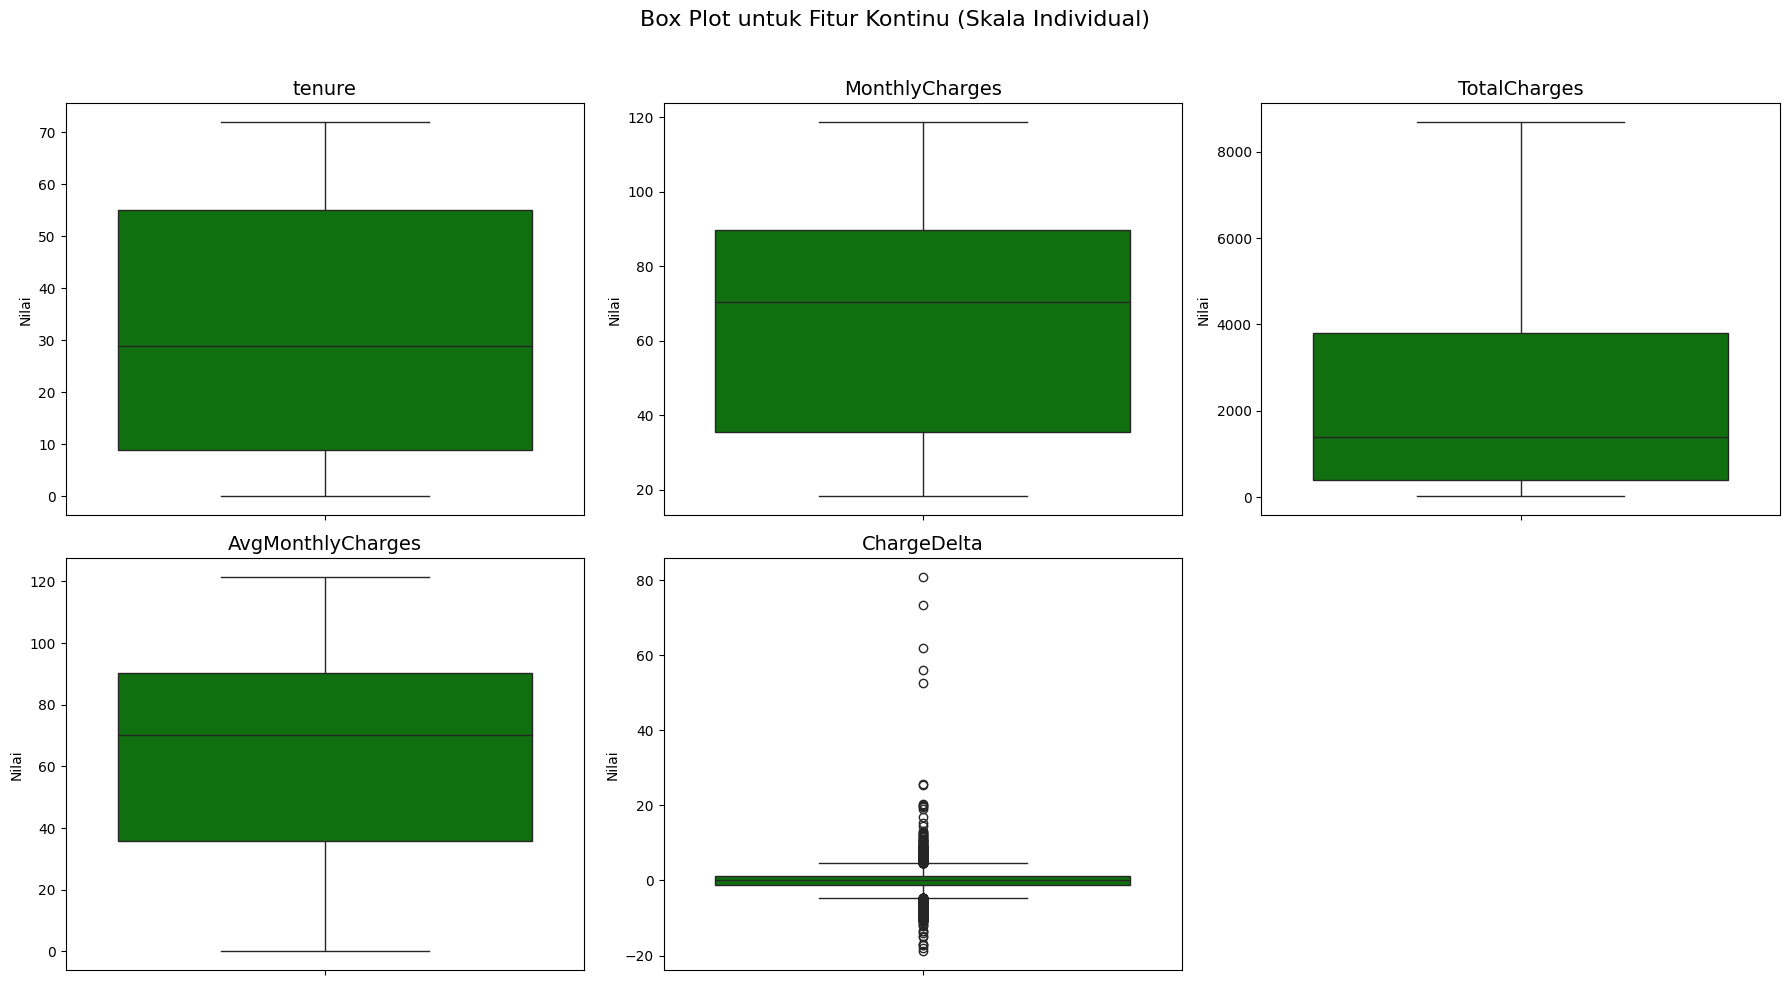

In [24]:
# Menentukan fitur kontinu untuk analisis outlier
continuous_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharges', 'ChargeDelta']
numeric_for_outlier = df_telco[continuous_cols]


# Membuat boxplot
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Box Plot untuk Fitur Kontinu (Skala Individual)', fontsize=16)
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(y=df_telco[col], ax=axes[i], color='green')
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('Nilai')

for j in range(len(continuous_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Visualisasi *Box Plot* menunjukkan bahwa kolom **`tenure`**, **`MonthlyCharges`**, **`TotalCharges`**, dan **`AvgMonthlyCharges`** memiliki distribusi yang relatif wajar tanpa adanya *outlier* signifikan pada nilai-nilai utama. Kolom **`ChargeDelta`** menunjukkan adanya beberapa *outlier* yang lebih ekstrem, yang bisa mengindikasikan adanya variasi yang lebih besar dalam data terkait perubahan biaya.

### **Cek Korelasi dengan Variabel Churn**

Kolom 'customerID' berhasil dihapus untuk memungkinkan perhitungan korelasi.

Korelasi Setiap Fitur dengan Variabel Churn:
Churn                                    1.000000
Tenure_Group_New Customer                0.317580
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
AvgMonthlyCharges                        0.193301
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
StreamingTV_Yes                          0.063228
StreamingMovies_Yes                      0.061382
MultipleLines_Yes                        0.040102
PhoneService                             0.011942
gender                                   0.008612
ChargeDelta                             -0.010348
MultipleLines_No phone service          -0.011942
Tenure_Group_Mid-Term                   -0.050398
DeviceProtection_Yes                    -0.066160
OnlineBackup_Yes           

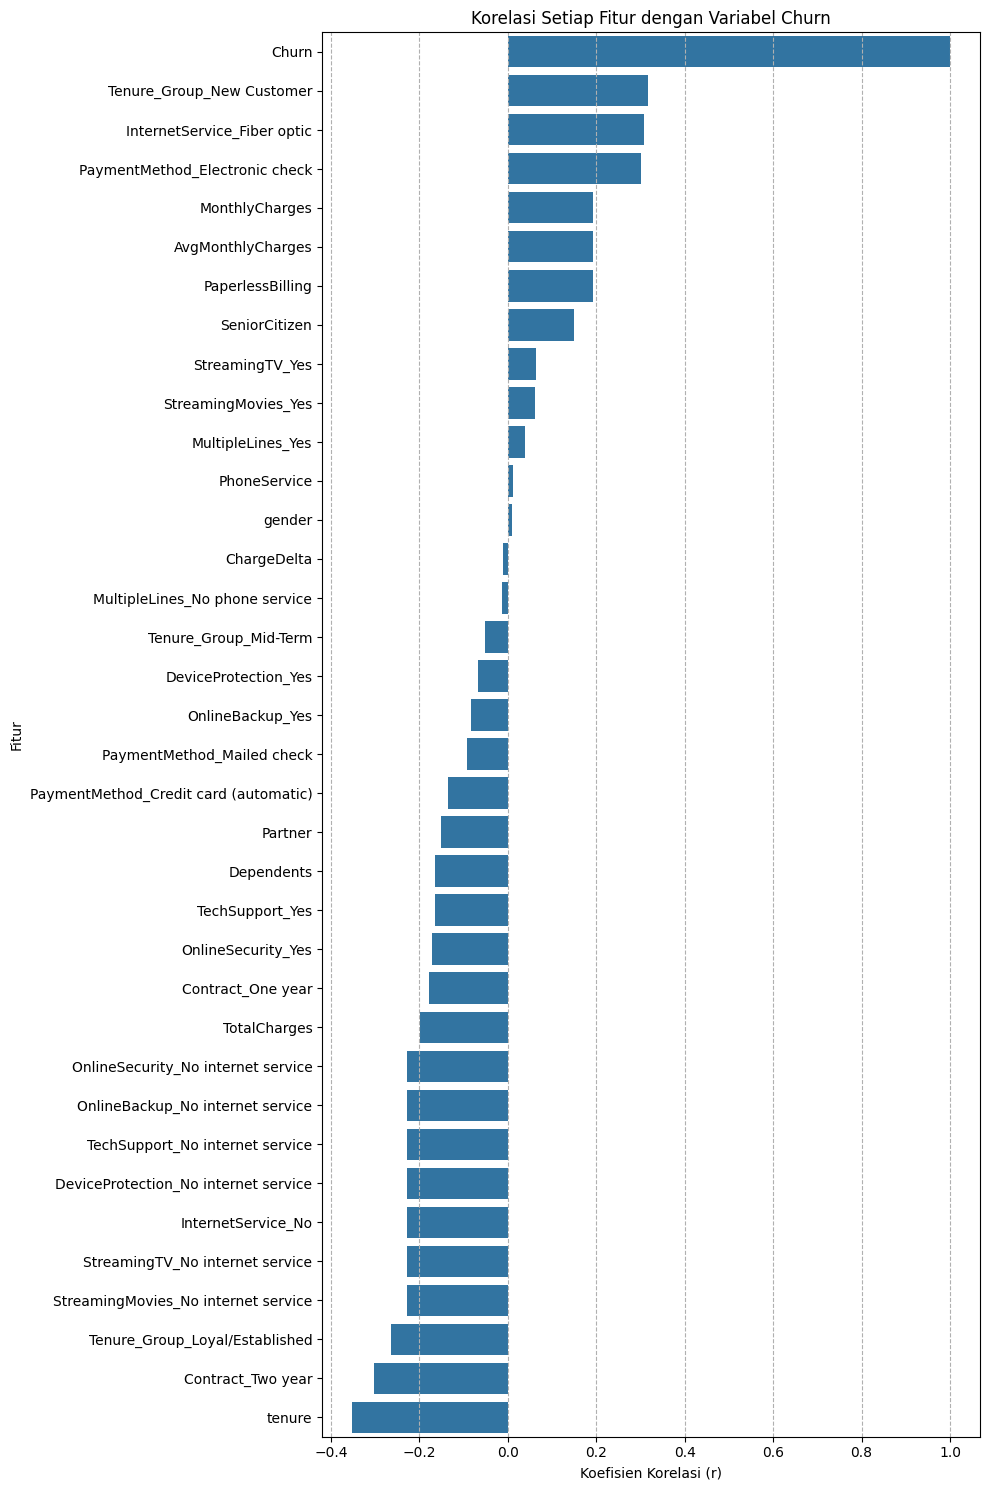

In [25]:
# Menghapus customerID
if 'customerID' in df_telco.columns:
    df_telco = df_telco.drop(columns=['customerID'])
    print("Kolom 'customerID' berhasil dihapus untuk memungkinkan perhitungan korelasi.")

# Menghapus kolom kategorikal asli ('Tenure_Group' dihapus karena sudah di-OHE)
df_telco = df_telco.drop(columns=['Tenure_Group'], errors='ignore')

# Identifikasi dan hapus kolom non-numerik lainnya jika ada, selain yang biner/sudah di-OHE.
non_numeric_cols = df_telco.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    df_telco = df_telco.drop(columns=non_numeric_cols)
    print(f"Kolom non-numerik yang tersisa ({list(non_numeric_cols)}) juga dihapus.")

# Hitung korelasi semua fitur numerik terhadap variabel target ('Churn')
churn_correlation = df_telco.corr()['Churn'].sort_values(ascending=False)

# Menampilkan hasil korelasi
print("\nKorelasi Setiap Fitur dengan Variabel Churn:")
print(churn_correlation)

# Membuat Bar Plot
plt.figure(figsize=(10, 15))
sns.barplot(x=churn_correlation.values, y=churn_correlation.index)

plt.title('Korelasi Setiap Fitur dengan Variabel Churn')
plt.xlabel('Koefisien Korelasi (r)')
plt.ylabel('Fitur')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()

Berdasarkan analisis korelasi, faktor yang paling berpengaruh terhadap **Churn** adalah **Tenure Group New Customer** dengan nilai korelasi (r ≈ 0.32), diikuti oleh penggunaan **Layanan Fiber Optic** (r ≈ 0.31) dan metode pembayaran **Cek Elektronik** (r ≈ 0.30). Sementara itu, faktor yang paling kuat dalam mencegah **Churn** adalah **Tenure** (r ≈ -0.35), yang menunjukkan bahwa semakin lama pelanggan berlangganan, semakin kecil kemungkinan mereka untuk berhenti berlangganan, diikuti oleh **Kontrak Dua Tahun** (r ≈ -0.30) dan **TotalCharges** (r ≈ -0.20).

## **Data Visualization**

In [26]:
df_telco_copy = pd.DataFrame(telco)

### **1. Stacked Bar Chart untuk Kontak (Contract) vs Churn**

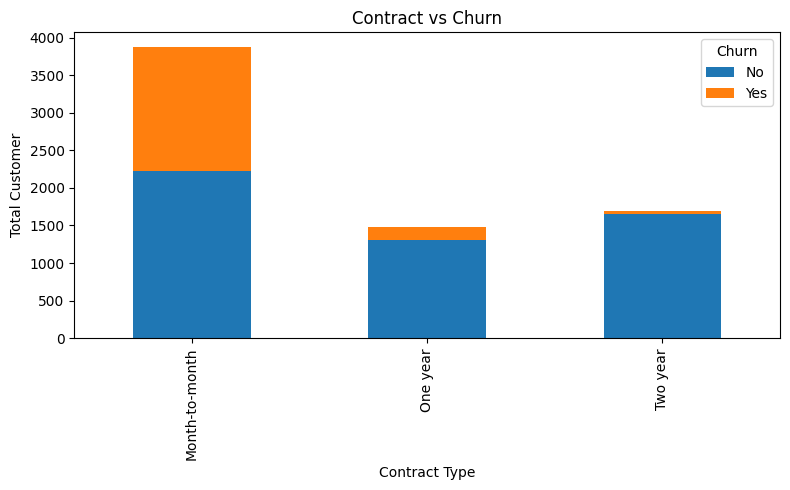

In [27]:
c_vs_c =pd.crosstab(df_telco_copy['Contract'], df_telco_copy['Churn'])

c_vs_c.plot(kind='bar', stacked=True, figsize=(8,5))

plt.title("Contract vs Churn")
plt.xlabel('Contract Type')
plt.ylabel('Total Customer')
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi terhadap kolom Churn dan Contract menggunakan Stacked Bar Chart dapat disimpulkan bahwa tipe Contract Month-to-month memiliki proporsi Churn tertinggi daripada tipe one year dan two year. Artinya pelanggan lebih memilih untuk melanjutkan berlangganan dengan tipe Contract Month-to-month dibanding one year dan two year

### **2. Distribusi Biaya Bulanan dan Lama Berlangganan Berdasarkan Status Churn**

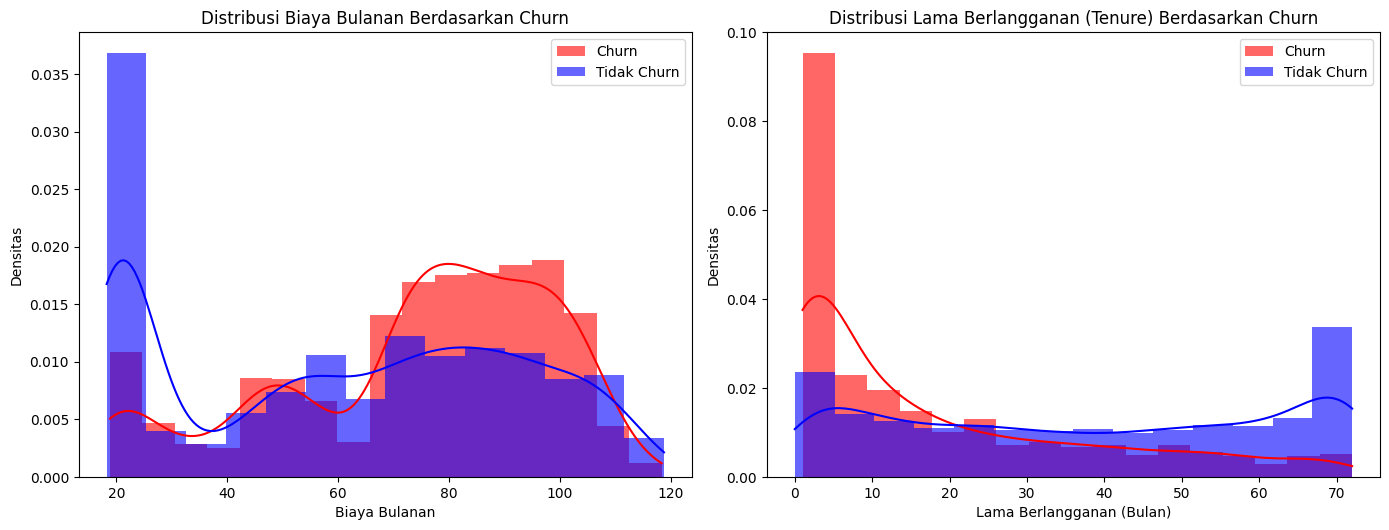

In [28]:
# Buat Plot Distribusi
plt.figure(figsize=(14, 10))

# Plot distribusi 'MonthlyCharges' untuk pelanggan yang churn dan tidak churn
plt.subplot(2, 2, 1)
# Plot densitas Biaya Bulanan untuk yang Churn ('Yes')
sns.histplot(
    df_telco_copy[df_telco_copy['Churn'] == 'Yes']['MonthlyCharges'],
    kde=True,
    color='red',
    label='Churn',
    stat='density',
    linewidth=0,
    alpha=0.6
)
# Plot densitas Biaya Bulanan untuk yang Tidak Churn ('No')
sns.histplot(
    df_telco_copy[df_telco_copy['Churn'] == 'No']['MonthlyCharges'],
    kde=True,
    color='blue',
    label='Tidak Churn',
    stat='density',
    linewidth=0,
    alpha=0.6
)
plt.title('Distribusi Biaya Bulanan Berdasarkan Churn')
plt.xlabel('Biaya Bulanan')
plt.ylabel('Densitas')
plt.legend()

# Plot distribusi 'tenure' untuk pelanggan yang churn dan tidak churn
plt.subplot(2, 2, 2)
# Plot densitas Tenure untuk yang Churn ('Yes')
sns.histplot(
    df_telco_copy[df_telco_copy['Churn'] == 'Yes']['tenure'],
    kde=True,
    color='red',
    label='Churn',
    stat='density',
    linewidth=0,
    alpha=0.6
)
# Plot densitas Tenure untuk yang Tidak Churn ('No')
sns.histplot(
    df_telco_copy[df_telco_copy['Churn'] == 'No']['tenure'],
    kde=True,
    color='blue',
    label='Tidak Churn',
    stat='density',
    linewidth=0,
    alpha=0.6
)
plt.title('Distribusi Lama Berlangganan (Tenure) Berdasarkan Churn')
plt.xlabel('Lama Berlangganan (Bulan)')
plt.ylabel('Densitas')
plt.legend()

plt.tight_layout()
plt.show()

Dari grafik Distribusi Monthly Charge terhadap Churn dapat disimpulkan bahwa Pelanggan dengan Monthly Charge yang tinggi (sekitar $70-$110) lebih mungkin untuk Churn (berhenti berlangganan) dibandingkan dengan pelanggan berbiaya rendah (sekitar $20).


Dari grafik Distribusi Tenure terhadap Churn dapat disimpulkan bahwa Pelanggan baru dengan Durasi Berlangganan (Tenure(months)) yang sangat singkat memiliki probabilitas Churn yang jauh lebih tinggi. Sebaliknya, pelanggan yang tidak Churn cenderung memiliki Durasi Tenure yang lebih lama dan sangat lama.

### **3. Tingkat Churn (Ya/Tidak) Berdasarkan Jenis Layanan Internet**

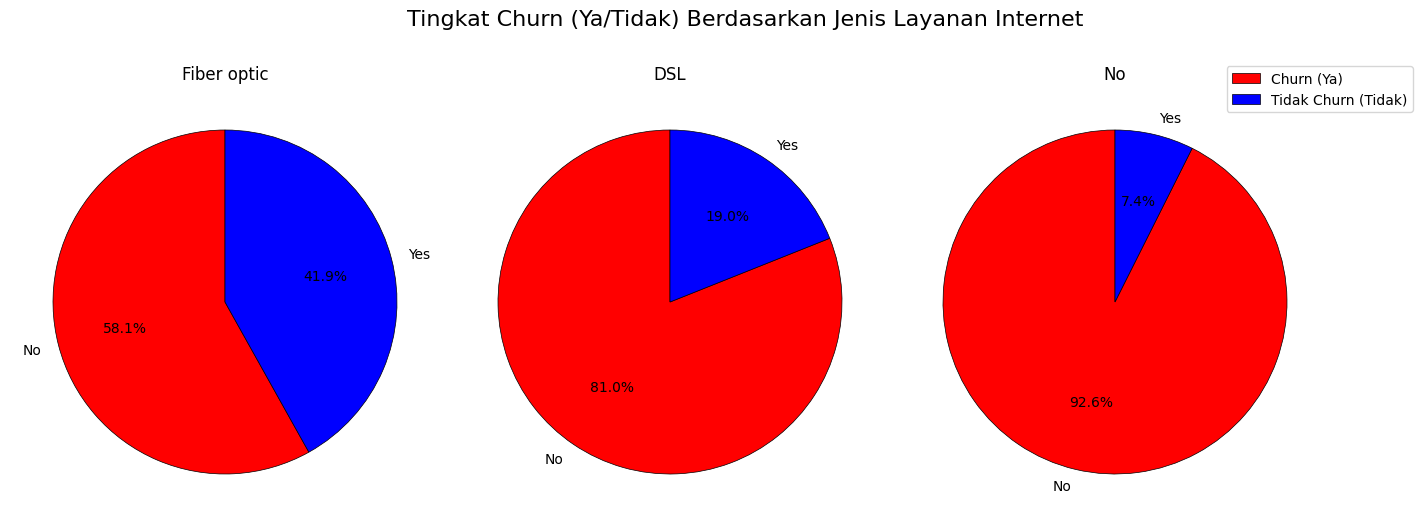

In [29]:
jenis_layanan = ['Fiber optic', 'DSL', 'No']
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle('Tingkat Churn (Ya/Tidak) Berdasarkan Jenis Layanan Internet', fontsize=16, y=1.05)

warna = ['red', 'blue']

for i, layanan in enumerate(jenis_layanan):
    # Filter data untuk jenis layanan saat ini
    data_layanan = df_telco_copy[df_telco_copy['InternetService'] == layanan]

    # Hitung jumlah Churn dan Non-Churn
    jumlah_churn = data_layanan['Churn'].value_counts()

    # Buat Diagram Pai (Pie Chart)
    axes[i].pie(jumlah_churn,
                labels=jumlah_churn.index,
                autopct='%1.1f%%',
                startangle=90,
                colors=warna,
                wedgeprops={'edgecolor': 'black', 'linewidth': 0.5})

    axes[i].set_title(f'{layanan}', fontsize=12)

fig.legend(['Churn (Ya)', 'Tidak Churn (Tidak)'], loc='upper right', bbox_to_anchor=(0.95, 0.95))

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()

Grafik di atas menampilkan perbandingan **tingkat *churn* (Ya)** dan **tingkat tidak *churn* (Tidak)** berdasarkan **jenis layanan internet** yang digunakan pelanggan, yaitu **Fiber optic**, **DSL**, dan layanan **Tidak Ada (No)** internet. Secara keseluruhan, **pelanggan dengan layanan internet Fiber optic memiliki tingkat *churn* tertinggi** (41.9% dari pelanggan *Fiber optic*), diikuti oleh layanan **DSL** dengan tingkat *churn* yang jauh lebih rendah (19.0% dari pelanggan *DSL*). Menariknya, **pelanggan yang tidak menggunakan layanan internet sama sekali (No)** menunjukkan **tingkat *churn* terendah** (hanya 7.4%), yang mengindikasikan bahwa pelanggan tanpa layanan internet cenderung lebih loyal dibandingkan dengan yang menggunakan layanan internet, terutama Fiber optic.

### **4. Distribusi Lama Berlangganan berdasarkan Metode Pembayaran dan Status Churn**

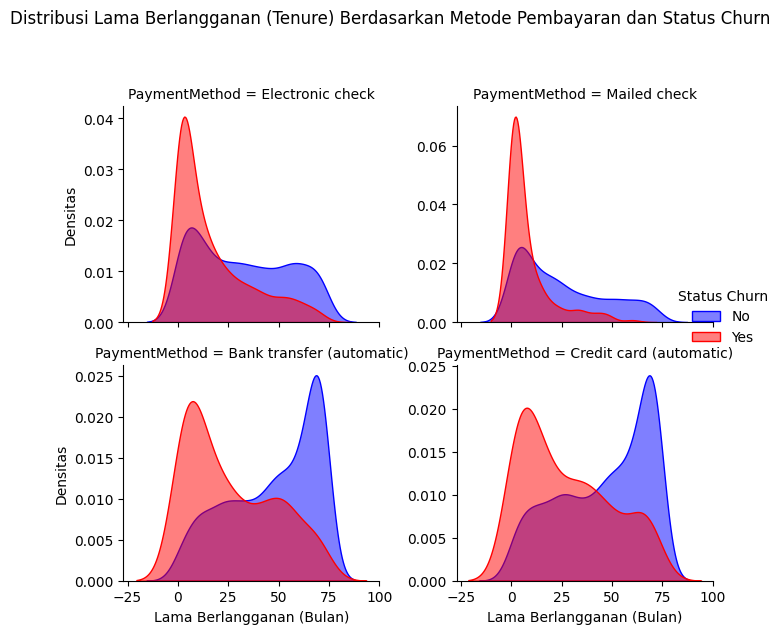

In [30]:
# Buat plot densitas
g = sns.FacetGrid(
    df_telco_copy,
    col='PaymentMethod',
    hue='Churn',
    sharey=False,
    col_wrap=2,
    palette={'Yes': 'red', 'No': 'blue'}
)


g.map(sns.kdeplot, 'tenure', fill=True, alpha=0.5)

g.add_legend(title='Status Churn')
g.fig.suptitle('Distribusi Lama Berlangganan (Tenure) Berdasarkan Metode Pembayaran dan Status Churn', y=1.05)
g.set_axis_labels('Lama Berlangganan (Bulan)', 'Densitas')
plt.tight_layout()
plt.show()

Grafik ini memperlihatkan distribusi lama berlangganan (dalam bulan) yang dipisahkan berdasarkan empat metode pembayaran utama dan status churn (Ya/Tidak). Terlihat jelas bahwa pelanggan yang menggunakan metode pembayaran **Electronic check** (cek elektronik) memiliki lama berlangganan yang cenderung singkat dan menunjukkan puncak churn (garis merah) yang tinggi pada awal masa langganan. Sebaliknya, metode pembayaran **Bank transfer (automatic)** dan **Credit card (automatic)** menunjukkan distribusi pelanggan yang lebih loyal (garis biru) dengan tenure yang lebih panjang, mencapai puncaknya pada sekitar 60-70 bulan, menandakan bahwa pelanggan dengan metode pembayaran otomatis ini lebih cenderung bertahan dan tidak churn. Metode **Mailed check** (cek pos) menunjukkan pola yang mirip dengan **Electronic check**, tetapi dengan puncak churn yang sedikit lebih rendah.


### **5. Tingkat Churn Berdasarkan Lama Berlangganan (Animasi)**

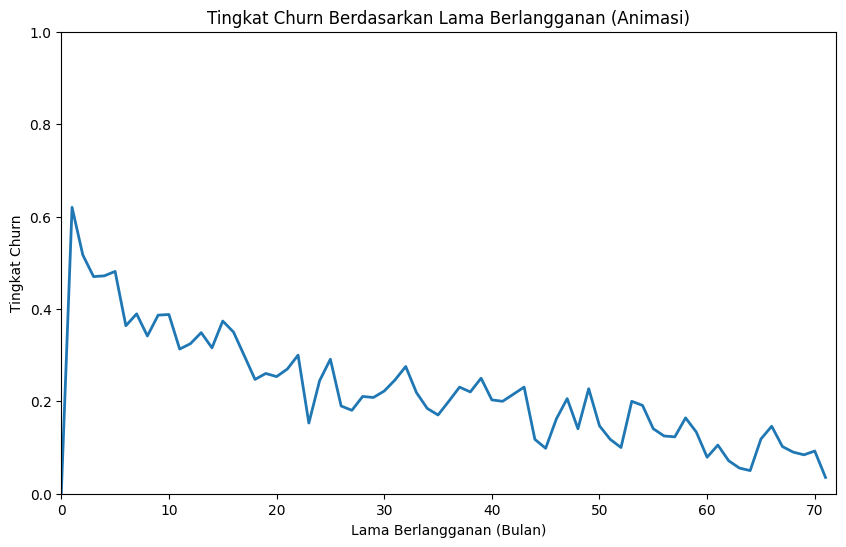

In [31]:
# Hitung rata-rata churn untuk setiap tenure
tenure_groups = df_telco.groupby('tenure')['Churn'].mean()

# Buat grafik
fig, ax = plt.subplots(figsize=(10, 6))


ax.set_title('Tingkat Churn Berdasarkan Lama Berlangganan (Animasi)')
ax.set_xlabel('Lama Berlangganan (Bulan)')
ax.set_ylabel('Tingkat Churn')


ax.set_xlim(tenure_groups.index.min(), tenure_groups.index.max())
ax.set_ylim(0, 1)


line, = ax.plot([], [], lw=2)


# fungsi inisialisasi
def init():
    line.set_data([], [])
    return line,


# fungsi pembaruan frame
def update(frame):
    x = tenure_groups.index[:frame]
    y = tenure_groups.values[:frame]
    line.set_data(x, y)
    return line,


# buat animasi
ani = animation.FuncAnimation(
    fig,
    update,
    frames=len(tenure_groups),
    init_func=init,
    blit=True,
    interval=100
)

HTML(ani.to_jshtml())

Grafik garis ini menunjukkan **korelasi negatif yang kuat** antara **lama berlangganan (bulan)** dan **tingkat *churn***. Pada bulan-bulan awal, tingkat *churn* berada pada titik tertinggi, yaitu **sekitar 60% pada bulan pertama**. Tingkat *churn* kemudian **menurun drastis** dan stabil seiring bertambahnya lama berlangganan. Penurunan yang paling signifikan terjadi dalam **10-20 bulan pertama**, di mana tingkat *churn* menurun hingga di bawah 40% dan terus melandai ke arah 10% seiring pelanggan mencapai *tenure* yang lebih panjang (di atas 60 bulan). Pola ini mengindikasikan bahwa **pelanggan baru memiliki risiko *churn* yang jauh lebih tinggi** dibandingkan pelanggan yang telah setia dalam jangka waktu yang lama.

## **Inference**

### **Feature Selection**

In [32]:
# Ambang batas (threshold) korelasi absolut
correlation_threshold = 0.1

# Pilih fitur yang nilai absolut korelasinya melebihi ambang batas 0.1
selected_features = churn_correlation[abs(churn_correlation) > correlation_threshold]
print(selected_features)

# Drop baris kosong jika masih ada
df_telco.dropna(inplace=True)

kolom_terpilih = selected_features.index.tolist()

if 'Churn' in kolom_terpilih:
    kolom_terpilih.remove('Churn')

X = df_telco[kolom_terpilih]
y = df_telco['Churn']

Churn                                    1.000000
Tenure_Group_New Customer                0.317580
InternetService_Fiber optic              0.308020
PaymentMethod_Electronic check           0.301919
MonthlyCharges                           0.193356
AvgMonthlyCharges                        0.193301
PaperlessBilling                         0.191825
SeniorCitizen                            0.150889
PaymentMethod_Credit card (automatic)   -0.134302
Partner                                 -0.150448
Dependents                              -0.164221
TechSupport_Yes                         -0.164674
OnlineSecurity_Yes                      -0.171226
Contract_One year                       -0.177820
TotalCharges                            -0.199484
OnlineSecurity_No internet service      -0.227890
OnlineBackup_No internet service        -0.227890
TechSupport_No internet service         -0.227890
DeviceProtection_No internet service    -0.227890
InternetService_No                      -0.227890


Kode di atas digunakan untuk seleksi fitur dalam konteks pemodelan prediksi churn pelanggan. Fitur yang dipilih adalah kolom-kolom yang memiliki nilai absolut korelasi lebih besar dari 0.1 dengan variabel target **Churn**. Fitur yang relevan mencakup kolom-kolom seperti **Tenure_Group_New Customer**, **InternetService_Fiber optic**, **PaymentMethod_Electronic check**, dan **MonthlyCharges**, yang memiliki korelasi positif dengan **Churn**, serta **Contract_Two year**, **tenure**, dan beberapa fitur lain yang memiliki korelasi negatif dengan **Churn**. Selanjutnya, baris yang memiliki nilai NaN dihapus, dan variabel **X** berisi fitur-fitur yang relevan, sedangkan **y** berisi target **Churn** (apakah pelanggan churn atau tidak). Tujuan dari seleksi fitur ini adalah untuk memilih fitur yang signifikan dalam memprediksi churn, sekaligus mengurangi kompleksitas model dengan hanya menggunakan fitur-fitur yang berpengaruh signifikan.

### **Pembagian Data (X, y, Train, Test)**

In [33]:
# Pembagian data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")

Shape X_train: (4922, 24)
Shape X_test: (2110, 24)


Kode di atas digunakan untuk **membagi data** menjadi dua bagian, yaitu **data latih (train)** dan **data uji (test)**. Pembagian dilakukan dengan proporsi **70% untuk train** dan **30% untuk test**, menggunakan fungsi **`train_test_split`**. Parameter **`stratify=y`** memastikan bahwa proporsi target **Churn** dalam data latih dan data uji tetap seimbang, mencerminkan distribusi yang ada pada data asli. Fungsi ini juga memastikan pembagian yang konsisten dengan menggunakan **`random_state=42`**. Hasilnya, **`X_train`** dan **`y_train`** digunakan untuk melatih model, sedangkan **`X_test`** dan **`y_test`** digunakan untuk menguji kinerja model.


### **Standard Scaler**

In [34]:
ideal_continuous_cols = ['tenure', 'MonthlyCharges', 'AvgMonthlyCharges']

actual_continuous_cols = [
    col for col in ideal_continuous_cols
    if col in X_train.columns
]

X_train.loc[:, actual_continuous_cols] = X_train.loc[:, actual_continuous_cols].astype(np.float64)
X_test.loc[:, actual_continuous_cols] = X_test.loc[:, actual_continuous_cols].astype(np.float64)

# Lakukan Scaling
scaler = StandardScaler()

# Fit scaler hanya pada data TRAINING dan transformasikan
X_train.loc[:, actual_continuous_cols] = scaler.fit_transform(
    X_train[actual_continuous_cols].to_numpy()
)

# Transformasikan data TESTING
X_test.loc[:, actual_continuous_cols] = scaler.transform(
    X_test[actual_continuous_cols].to_numpy()
)

print(f"Shape X_train: {X_train.shape}")
print(f"Shape X_test: {X_test.shape}")
print(f"StandardScaler berhasil diterapkan pada kolom: {actual_continuous_cols}")
print("\nContoh X_train setelah scaling:")
print(X_train[actual_continuous_cols].head())

Shape X_train: (4922, 24)
Shape X_test: (2110, 24)
StandardScaler berhasil diterapkan pada kolom: ['tenure', 'MonthlyCharges', 'AvgMonthlyCharges']

Contoh X_train setelah scaling:
        tenure  MonthlyCharges  AvgMonthlyCharges
4499 -0.833469        0.444749           0.360037
1933 -0.508058       -1.492135          -1.450357
4668 -1.240233       -0.120451          -0.061339
5681  0.061411       -0.021293          -0.095093
3610 -0.833469        1.166949           1.059952


Kode di atas menggunakan **StandardScaler** untuk menstandarisasi fitur-fitur kontinu (`tenure`, `MonthlyCharges`, `AvgMonthlyCharges`) dengan mengubahnya sehingga memiliki **rata-rata nol** dan **standar deviasi satu**. Proses ini diperlukan untuk menghindari dominasi fitur dengan skala besar dalam perhitungan model, terutama pada model berbasis jarak seperti *Logistic Regression*. Pada tahap pertama, fungsi `.fit_transform()` diterapkan hanya pada data *training* untuk menghitung **rata-rata** dan **standar deviasi**, sedangkan data *testing* hanya di-*transform* menggunakan parameter yang dihitung dari data *training* untuk mencegah kebocoran informasi (*data leakage*). Setelah scaling, fitur-fitur kontinu pada data *train* dan *test* diubah menjadi tipe **float64** agar siap digunakan dalam model.

### **Penanganan Class Imbalance**

In [35]:
# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Menerapkan SMOTE pada data training
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(f"Data Training (setelah SMOTE): {X_train_smote.shape}")
print(f"Jumlah sampel Churn setelah SMOTE:\n{y_train_smote.value_counts()}")

Data Training (setelah SMOTE): (7228, 24)
Jumlah sampel Churn setelah SMOTE:
Churn
1    3614
0    3614
Name: count, dtype: int64


Kode di atas menggunakan **SMOTE (Synthetic Minority Over-sampling Technique)** untuk mengatasi masalah **Class Imbalance** pada data *training* (`X_train` dan `y_train`). SMOTE bekerja dengan menganalisis sampel kelas minoritas (`Churn=1`) dan **menciptakan sampel data sintetis baru** di antara sampel yang ada. Tujuannya adalah menyeimbangkan jumlah sampel kelas minoritas agar **sama** dengan jumlah kelas mayoritas (`Churn=0`), yang menghasilkan `X_train_smote` dan `y_train_smote`. Proses ini sangat penting karena mencegah model *machine learning* bias hanya memprediksi kelas mayoritas, sehingga meningkatkan kemampuan model dalam mendeteksi pelanggan yang benar-benar akan *churn*.

### **Pelatihan Model Dasar (Base Models)**

In [36]:
# Inisialisasi Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
lr_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Pelatihan Model Dasar
rf_model.fit(X_train_smote, y_train_smote)
lr_model.fit(X_train_smote, y_train_smote)

# --- GRID SEARCH TUNING UNTUK GBC ---
print("\n--- TUNING GBC ---")
gb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}
gb_grid = GridSearchCV(gb_model, gb_param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=0)
gb_grid.fit(X_train_smote, y_train_smote)
gb_best_model = gb_grid.best_estimator_
print(f"GBC Skor AUC Terbaik: {gb_grid.best_score_:.4f}, Params: {gb_grid.best_params_}")


# --- GRID SEARCH TUNING UNTUK XGBOOST ---
print("\n--- TUNING XGBOOST ---")
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 6],
    'subsample': [0.7, 1.0]
}
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=0)
xgb_grid.fit(X_train_smote, y_train_smote)
xgb_best_model = xgb_grid.best_estimator_
print(f"XGBoost Skor AUC Terbaik: {xgb_grid.best_score_:.4f}, Params: {xgb_grid.best_params_}")


--- TUNING GBC ---
GBC Skor AUC Terbaik: 0.9020, Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200}

--- TUNING XGBOOST ---


c:\Users\erade\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:199: UserWarning: [04:09:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Skor AUC Terbaik: 0.9050, Params: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 200, 'subsample': 0.7}


Kode di atas digunakan untuk **melatih dan mengoptimalkan empat model klasifikasi** untuk memprediksi **churn pelanggan**. Proses ini memanfaatkan data latih yang telah diseimbangkan menggunakan **SMOTE** (`X_train_smote`, `y_train_smote`).

1. **Model Dasar:** **Random Forest Classifier** dan **Logistic Regression** dilatih langsung pada data latih yang telah diseimbangkan.
2. **Tuning Model *Boosting*:** **Gradient Boosting Classifier (GBC)** dan **XGBoost Classifier** menjalani proses **Hyperparameter Tuning** menggunakan `GridSearchCV`. Proses ini mencari kombinasi parameter terbaik (seperti `n_estimators`, `learning_rate`, `max_depth`, dll.) untuk menghasilkan **skor ROC-AUC terbaik** berdasarkan *cross-validation*, menghasilkan model optimal (`gb_best_model` dan `xgb_best_model`).
3. **Tujuan:** Pelatihan ini bertujuan untuk mendapatkan model dasar yang kuat dan dioptimalkan (terutama model *boosting*), yang dapat digunakan sebagai fondasi untuk *ensemble learning* (seperti Voting dan Stacking), yang akan lebih meningkatkan kemampuan prediksi churn secara keseluruhan.


### **Ensemble Learning (Voting & Stacking)**

#### Voting Classifier

In [37]:
estimators_tuned = [
    ('rf', rf_model),
    ('lr', lr_model),
    ('gb', gb_best_model),
    ('xgb', xgb_best_model)
]

vt_model = VotingClassifier(estimators=estimators_tuned, voting='soft', n_jobs=-1)
vt_model.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_jobs=-1,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(max_iter=1000, random_state=42,
                                                 solver='liblinear')),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.05,
                                                         max_depth=5,
                                                         n_estimators=200,
                                                         random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            c...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 n_jobs=-1, voting='soft')

Kode di atas digunakan untuk **menggabungkan empat model klasifikasi** yang telah dilatih dan di*tuning* sebelumnya (Random Forest, Logistic Regression, Gradient Boosting Terbaik, dan XGBoost Terbaik) menjadi satu model *ensemble* menggunakan **VotingClassifier**. Metode **`voting='soft'`** mengindikasikan bahwa prediksi akhir model didasarkan pada rata-rata probabilitas dari keempat model, sehingga memanfaatkan keyakinan kolektif mereka. Parameter **`n_jobs=-1`** memungkinkan pemrosesan paralel untuk mempercepat pelatihan. Model gabungan ini kemudian dilatih menggunakan data latih yang telah diseimbangkan (**`X_train_smote`** dan **`y_train_smote`**), dengan tujuan utama meningkatkan kemampuan prediksi *churn* secara keseluruhan (terutama ROC AUC) melalui integrasi kekuatan dari setiap algoritma yang berbeda.

#### Stacking Classifier

In [38]:
st_model = StackingClassifier(
    estimators=estimators_tuned,
    final_estimator=LogisticRegression(solver='liblinear'),
    cv=5,
    n_jobs=-1
)
st_model.fit(X_train_smote, y_train_smote)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_jobs=-1,
                                                       random_state=42)),
                               ('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42,
                                                   solver='liblinear')),
                               ('gb',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           n_estimators=200,
                                                           random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel...
                                              interaction_constraints=None,
                                              learning_rate=0.05, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=6,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None, ...))],
                   final_estimator=LogisticRegression(solver='liblinear'),
                   n_jobs=-1)

Kode di atas digunakan untuk **melatih model *ensemble* menggunakan `StackingClassifier`** , yang menggabungkan **empat model dasar** (*base estimators*) yang telah di*tuning* (Random Forest, Logistic Regression, Gradient Boosting Terbaik, dan XGBoost Terbaik) menjadi satu model hierarkis. Model **Logistic Regression** (dengan `solver='liblinear'`) digunakan sebagai **model akhir** (*final estimator* atau *meta-model*) yang bertugas mengambil *output* prediksi (atau probabilitas) dari keempat model dasar untuk membuat prediksi final. Parameter **`cv=5`** berarti menggunakan **cross-validation dengan 5 lipatan** untuk menghasilkan *out-of-fold predictions* (prediksi dari model dasar pada data yang tidak digunakan untuk melatihnya) yang kemudian digunakan sebagai *input* untuk melatih model akhir. **`n_jobs=-1`** memungkinkan pemrosesan paralel untuk mempercepat seluruh proses pelatihan. Pelatihan dilakukan pada data latih yang telah diseimbangkan (**`X_train_smote`** dan **`y_train_smote`**), dengan tujuan utama untuk mendapatkan kinerja prediksi yang lebih tinggi dan lebih stabil daripada model tunggal.

### **Evaluasi Model Dasar dan Ensemble**

In [39]:
def evaluate_model(model, X_test, y_test, model_name):
    """Fungsi untuk melakukan prediksi dan mencetak laporan klasifikasi serta AUC."""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    # Laporan Klasifikasi
    report = classification_report(y_test, y_pred, output_dict=True)

    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_proba)

    print(f"\n--- Laporan Klasifikasi untuk {model_name} (AUC: {roc_auc:.4f}) ---")
    print(pd.DataFrame(report).transpose())

    return y_proba, roc_auc, y_pred

print("\n=======================================================")
print("============== HASIL EVALUASI SEMUA MODEL ==============")
print("=======================================================")

# Model Dasar
rf_proba, rf_auc, rf_pred = evaluate_model(rf_model, X_test, y_test, "Random Forest")
lr_proba, lr_auc, lr_pred = evaluate_model(lr_model, X_test, y_test, "Logistic Regression")
gb_proba, gb_auc, gb_pred = evaluate_model(gb_best_model, X_test, y_test, "Gradient Boosting (Tuned)") # <-- PENTING: Gunakan model terbaik (gb_best_model)
xgb_proba, xgb_auc, xgb_pred = evaluate_model(xgb_best_model, X_test, y_test, "XGBoost (Tuned)")

# Model Ensemble
vt_proba, vt_auc, vt_pred = evaluate_model(vt_model, X_test, y_test, "Voting Classifier")
st_proba, st_auc, st_pred = evaluate_model(st_model, X_test, y_test, "Stacking Classifier")


============== HASIL EVALUASI SEMUA MODEL ==============

--- Laporan Klasifikasi untuk Random Forest (AUC: 0.8084) ---
              precision    recall  f1-score      support
0              0.854435  0.814719  0.834104  1549.000000
1              0.546603  0.616756  0.579564   561.000000
accuracy       0.762085  0.762085  0.762085     0.762085
macro avg      0.700519  0.715737  0.706834  2110.000000
weighted avg   0.772590  0.762085  0.766428  2110.000000

--- Laporan Klasifikasi untuk Logistic Regression (AUC: 0.8045) ---
              precision    recall  f1-score      support
0              0.869533  0.757263  0.809524  1549.000000
1              0.505913  0.686275  0.582451   561.000000
accuracy       0.738389  0.738389  0.738389     0.738389
macro avg      0.687723  0.721769  0.695987  2110.000000
weighted avg   0.772855  0.738389  0.749150  2110.000000

--- Laporan Klasifikasi untuk Gradient Boosting (Tuned) (AUC: 0.8129) ---
              precision    recall  f1-score      su

Kode di atas digunakan untuk **evaluasi kinerja berbagai model** klasifikasi yang telah dilatih menggunakan data yang telah di*scaling* dan di*resample* dengan SMOTE, termasuk model dasar (**Random Forest, Logistic Regression, Gradient Boosting Tuned, XGBoost Tuned**) dan model *ensemble* (**Voting Classifier, Stacking Classifier**). Fungsi `evaluate_model` memprediksi hasil pada data uji (`X_test` dan `y_test`), mencetak **laporan klasifikasi** (mencakup *precision*, *recall*, dan F1-score), serta menghitung **ROC AUC** untuk menilai kemampuan pembeda kelas model. Hasil evaluasi ini ditampilkan untuk membandingkan kemampuan setiap model dalam memprediksi **churn** pelanggan.

Berdasarkan hasil evaluasi:

1.  **Voting Classifier** menunjukkan **performa terbaik** dalam hal kemampuan membedakan kelas (*ROC AUC*) dengan nilai **$0.8167$**, diikuti sangat dekat oleh **Stacking Classifier** ($0.8160$).
2.  **Kelas 1 (Churn)** adalah kelas minoritas dan merupakan metrik kritis. Untuk masalah prediksi *churn*, metrik **Recall Class 1** adalah yang paling penting (seberapa banyak pelanggan *churn* yang benar-benar teridentifikasi).
    * **Voting Classifier** memiliki **Recall Class 1 tertinggi** (**$0.677362$**).
    * **XGBoost (Tuned)** berada di posisi kedua (**$0.661319$**).
    * **Gradient Boosting (Tuned)** berada di posisi ketiga (**$0.668449$**).
3.  Dalam hal **F1-Score Class 1** (keseimbangan antara *Precision* dan *Recall*), **Voting Classifier** juga unggul dengan **$0.601742$**.

Secara keseluruhan, **Voting Classifier** menunjukkan **performa paling optimal** (AUC tertinggi dan Recall Class 1 tertinggi), yang berarti model ini paling efektif dalam mengidentifikasi pelanggan yang *benar-benar* akan *churn* sambil mempertahankan kemampuan pembeda kelas yang sangat baik. **Voting Classifier** (setelah *scaling* dan *SMOTE*) adalah model yang paling optimal untuk implementasi akhir, karena menggabungkan kekuatan dari beberapa model dasar.